# Lab 1.5
In this homework, the exercises are based on the problems solved in the pre-asssement test.

## Set-up

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print("Modules Imported!")

Modules Imported!


## Ploting pdf and CDF

In Python, distributions and related functions can be created using scipy.stat. The general form is (using st for scipy.stat, assuming 2 parameters):
```python
myRV = st.RVName(param1,param2,loc=0,scale=1)
```
Enter the loc and scale parameters if they are different from the default. You can then get the pdf at x as
```python
myRV.pdf(x)
```
We'll see this for the Beta distribution below. The Beta distributon has two parameters $\alpha$ and $\beta$ (called shape parameters).

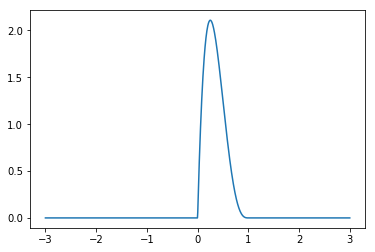

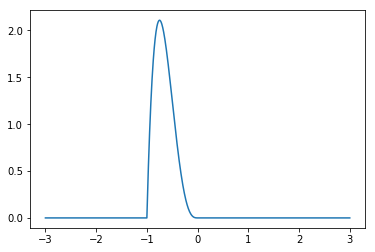

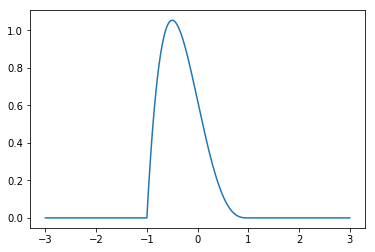

In [2]:
mybeta = st.beta(2,4) # default location and scale
r = np.linspace(-3,3,1000)
plt.plot(r,mybeta.pdf(r))
mybeta1 = st.beta(2,4,-1) # shift 1 to the left
plt.figure()
plt.plot(r,mybeta1.pdf(r))
mybeta2 = st.beta(2,4,-1,2) # shift 1 to the left and scale by 2
plt.figure()
plt.plot(r,mybeta2.pdf(r))

In Scipy, the normal random variable is defined using its location and scale as `st.norm(loc,scale)`. The location represents the mean and the scale represents the standard deviation:

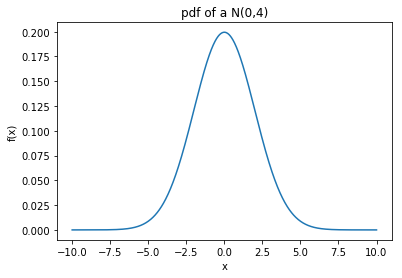

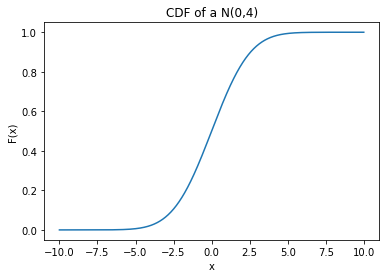

In [3]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4 (standard deviation 2)
r = np.linspace(-10,10,1000)
plt.plot(r,mynorm.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('pdf of a N(0,4)')
plt.figure()
plt.plot(r,mynorm.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of a N(0,4)')

#### _$\color{red}{Exercise\  1}$_: 
Plot the pdf and CDF for exponential and Gamma distributions. Use [st.expon(location,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [st.gamma(a,loc,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html). Pick the parameters arbitrarily.

Exponential with rate parameter 3, Exp(3), (mean and standard deviation 1/3)
Gamma which has distn equal to that of Exp(3)+Exp(3)


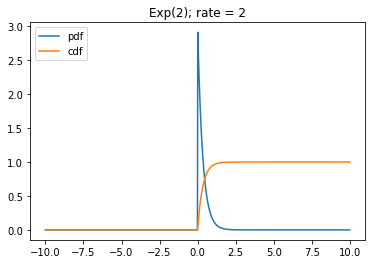

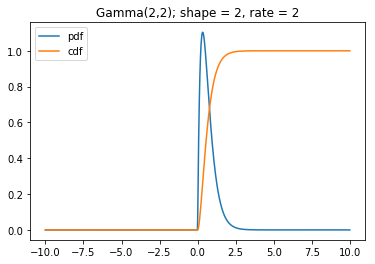

In [4]:
r = np.linspace(-10,10,1000)
print("Exponential with rate parameter 3, Exp(3), (mean and standard deviation 1/3)")
print("Gamma which has distn equal to that of Exp(3)+Exp(3)")
myexp = st.expon(0,1/3)
plt.plot(r,myexp.pdf(r));
plt.plot(r,myexp.cdf(r));
plt.legend(["pdf","cdf"],loc=2);
plt.title("Exp(2); rate = 2");
plt.figure()
mygamma = st.gamma(2,0,1/3)
plt.plot(r,mygamma.pdf(r));
plt.plot(r,mygamma.cdf(r));
plt.title("Gamma(2,2); shape = 2, rate = 2");
plt.legend(["pdf","cdf"],loc=2);



## Sampling from distributions
Law of large numbers (LLN) states that under certain conditions the average of many samples of a random variable goes to its expected value as the number of samples increases. 
$$\frac1n\sum_{i=1}^n X_i\to E[X] \text{  as  } n\to \infty $$
This allows us to estimate the mean and variance of a RV by taking many samples. For variance, in the above equation, we replace $X$ with $(X-E[X])^2$. An example is shown for $N(0,4)$.

In [5]:
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
m = sum(X)/len(X) # Average as an estimate of mean
print(m) # Compare with 0
v = sum([(x-m)*(x-m) for x in X])/len(X)
print(v) # Compare with 4

0.00602047157063
3.98614364417


#### _$\color{red}{Exercise\  2}$_: 
Pick arbitrary but non-trivial distributions for X and Y. By generating samples, estimate $E[X+Y^2]$, $EX+(EY)^2$, $EX+(EY^2),$ and compare the estimates.

In [6]:
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
Y = st.norm.rvs(3,5,size=10000) # Getting 10000 samples from N(3,25)
Y2 = [Y[i]*Y[i] for i in range(10000)]
XY2 = [X[i]+Y[i]*Y[i] for i in range(10000)]
EX = sum(X)/len(X) # Average as an estimate of mean
EY = sum(Y)/len(Y) # Average as an estimate of mean
EY2 = sum(Y2)/len(Y2) # Average as an estimate of mean
EXY2 = sum(XY2)/len(XY2) # Average as an estimate of mean
print("E[X+Y^2]:",EXY2)
print("E[X]+E[Y]^2:",EX+EY*EY)
print("E[X]+E[Y^2]:",EX+EY2)
print("By the linearity of expectation, we expect the first and third values to be the same!")

E[X+Y^2]: 35.0272236526
E[X]+E[Y]^2: 9.76998486677
E[X]+E[Y^2]: 35.0272236526
By the linearity of expectation, we expect the first and third values to be the same!


## Samples and histogram
If we take many samples from a given distribution, the histogram of those samples will be similar to the pdf because the fraction of samples in each small interval around a given value tends to the value of the pdf at that point when the number of samples is large. We can see this in action. (Natuarally, this can be used to estimate the pdf from samples. The method is called [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).)

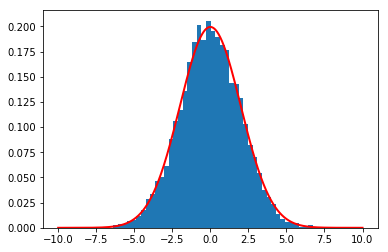

In [7]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4, N(0,4)
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
plt.hist(X,50,normed=True)
plt.plot(r,mynorm.pdf(r),'r',linewidth=2.0)

#### _$\color{blue}{Exercise\  3}$_: 

In the review test, we saw that if $$X\sim N(1,1)$$ and $$Y\sim N(0,3^2),$$ and $X$ and $Y$ are jointly Gaussian with correlation coefficient $\rho$, then $$Z=2X+3Y-2\sim N(0,85+36\rho).$$ 

Suppose that $\rho=1/2$. Sample from the joint distribution for $X$, $Y$. To do this you need to use [scipy.stats.multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html). For each sample compute $Z$. Plot the histogram for these samples and verify that they match $N(0,103)$. 

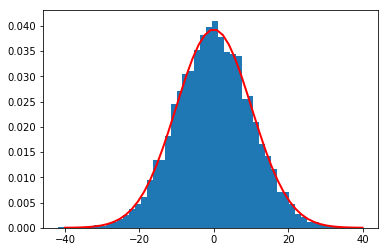

In [8]:
# We need to first create a multivariate normal random variable.
# For that we need to have its mean and covariance matrix
m = [1,0]
K = [[1,1*3*1/2],[1*3*1/2,3**2]]
XYRV = st.multivariate_normal(m,K)
# sample from distribution
XY = XYRV.rvs(size=10000)

Z = [2*x+3*y-2 for [x,y] in XY]
ZRV = st.norm(0,np.sqrt(103))
r = np.linspace(-40,40)
plt.hist(Z,50,normed=True)
plt.plot(r,ZRV.pdf(r),'r',linewidth=2.0)